## Numerical models

We start with the numerical solution of a very simple differential
equation. In fact we choose something simple enough that we already 
know the answer.

\\[
        \frac{d\theta}{dt} = - k \theta
\\]

This is the equation which governs radioactive decay, in which case
\\(\theta \\) is the amount of the radioactive isotope remaining and \\(d\theta /  dt\\)
is the activity that we can measure. \\(k \\) is closely related to the half life.

The solution to this equation is
\\[
        \theta(t) = \theta_0 e^{-kt}
\\]

where \\(\theta_0\\) is the amount of the radioactive material remaining.
The same equation also describes the cooling of, say, a cup of coffee. In this
case we interpret \\( \theta \\) as the excess temperature (above room temperature). 

<img src="images/theta_t1.png" width="66%">

Populating the interactive namespace from numpy and matplotlib


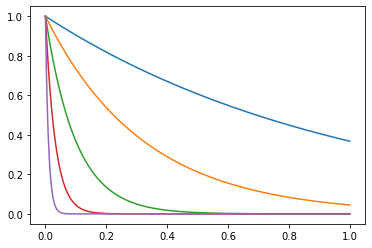

In [1]:
%pylab inline

import numpy as np

theta_0 = 1.0

time_values = np.linspace(0,1.0,1000)

for const_k in [1.0, 3.1, 10.0, 31, 100.0]:

    exact_theta_values = theta_0 * np.exp(-const_k * time_values)
    plot(time_values, exact_theta_values)


pass

We want to be able to march forward in time from our starting point
(just like the picture above)
where $\theta = \theta_0$ to obtain the value of $\theta$ at
later times. To do this, we need to approximate the original
differential equation, and, in particular, the value of the time
derivative at each time. There are a number of ways to do this.

### First order numerical approximation

Assume that the variation in \\(\theta(t) \\) is linear, i.e.
\\[
    \theta(t') = \theta_n + \beta t'
\\]

where we use a local time coordinate \\(t' = t - n\Delta t\\), so that when we differentiate

\\[
        \frac{d \theta}{dt} = \beta
\\]

To determine the approximation for the derivative therefore
becomes the solution to the following equation:

\\[
        \begin{split}
            & \theta_{n+1} = \theta_n + \beta \Delta t \\
            & \Rightarrow	\beta = \frac{d \theta}{dt} = \frac{\theta_{n+1} - \theta_n}{\Delta t}
        \end{split}
\\]

This is a first order difference expression for the derivative which we
substitute into the original differential equation for radioactive decay at
the current timestep

\\[
        \frac{\theta_{n+1} - \theta_n}{\Delta t} = - k \theta_n
\\]

This rearranges to give us a time-marching algorithm:

\\[
        \theta_{n+1} = \theta_n (1-k \Delta t)
\\]

It is an indication of the fact that this problem is really not all that difficult
that this difference equation can be written recursively
to give:
\\[
        \theta_{n+1} = \theta_0 (1-k \Delta t)^n
\\]

In a moment we will compute some values for this expression to see how
accurate it is. First we consider whether we can improve the accuracy of the
approximation by doing a bit more work.

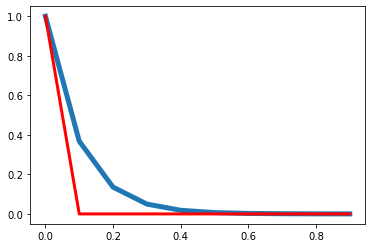

In [2]:
steps = 10
theta_0 = 1.0
const_k = 10.0
delta_t = 1.0 / steps


theta_values = np.zeros(steps)
time_values  = np.zeros(steps)


theta_values[0] = theta_0
time_values[0] = 0.0

for i in range(1, steps):
    theta_values[i] = theta_values[i-1] * (1 - const_k * delta_t)
    time_values[i] = time_values[i-1] + delta_t

exact_theta_values = theta_0 * np.exp(-const_k * time_values)
    
plot(time_values, exact_theta_values, linewidth=5.0)
plot(time_values, theta_values, linewidth=3.0, color="red")

### Higher order expansion

First we try fitting the local expansion for \\(\theta\\) through an
additional point.	 
This time we assume that the variation in \\(\theta(t)\\) is quadratic, i.e.
$$
    \theta(t') = \theta_{n-1} + \beta t' + \gamma {t'}^2
$$

The local time coordinate is $t' = t - (n-1)\Delta t$, and when we differentiate

$$       
    \frac{d \theta}{dt} = \beta + 2 \gamma t'
$$  

To solve for \\(\beta\\) and \\(\gamma\\) we fit the curve through the sample points:
$$
    \begin{split}
            \theta_n &= \theta_{n-1} + \beta \Delta t + \gamma (\Delta t)^2 \\
            \theta_{n+1} &= \theta_{n-1} + 2 \beta \Delta t + 4 \gamma (\Delta t)^2
     \end{split}
$$

Which solve to give
$$
     \begin{split}
     \beta &= \left( 4 \theta_n - \theta_{n+1} - 3\theta_{n-1} \right) \frac{1}{2\Delta t} \\
     \gamma &= \left( \theta_{n+1} + \theta_{n-1} -2 \theta_n \right) \frac{1}{2\Delta t^2} 
     \end{split}
$$

We can subsitute this back into the equation above and then into the original differential equation and we obtain the following

$$	 	
     \left. \frac{d\theta}{dt} \right|_{t=n\Delta t} = \beta + 2\gamma \Delta t =
     \frac{1}{2\Delta t} \left( \theta_{n+1} - \theta_{n-1} \right)  = -k \theta_n 
$$

The difference approximation to the derivative turns out to be the average of the expressions for the previous derivative and the new derivative. We have now included information about the current timestep and the previous timestep in our expression for the value of \\(\theta\\) at the forthcoming timestep:	

$$
     \theta_{n+1} = \theta_{n-1} -2k \theta_n \Delta t
$$

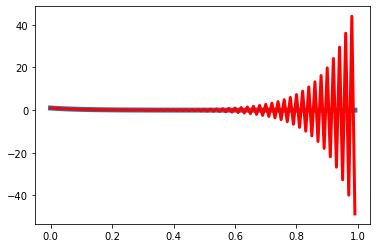

In [3]:
steps = 100
theta_0 = 1.0
const_k = 10.0
delta_t = 1.0 / steps

theta_values = np.zeros(steps)
time_values  = np.zeros(steps)

theta_values[0] = theta_0
time_values[0] = 0.0

theta_values[1] = theta_values[0] * (1 - const_k * delta_t)
time_values[1] = delta_t

for i in range(2, steps):
    theta_values[i] = theta_values[i-2] - 2.0 * theta_values[i-1] * const_k * delta_t
    time_values[i] = time_values[i-1] + delta_t

exact_theta_values = theta_0 * np.exp(-const_k * time_values)
    
plot(time_values, exact_theta_values, linewidth=5.0)
plot(time_values, theta_values, linewidth=3.0, color="red")

The results are more accurate when a smaller timestep is used although it
requires more computation to achieve the greater accuracy. Higher order expansion
also increases the accuracy and may be more efficient in terms of the number of computations
required for a given level of accuracy.

Note, however, that the supposedly better quadratic expansion produces an error which
oscillates as time increases. Does this error grow ? Does this make second order
expansions useless ?

### Second Order Runge-Kutta

<img src="images/theta_rk2-1.png" width="66%">

The Runge-Kutta approach to higher order integration methods is
illustrated in the figure above. The idea is to estimate the 
gradient \\(d \theta / d t\\) at the half way point between two
timestep values.  This is done in two stages. Initially a 
first order estimate, \\( \hat{\theta} \\) is made for the value of the function
\\( \theta\\) at \\(t=t+\Delta t /2\\) in the future. This value is then
subsituted into the differential equation to obtain the
estimate for the gradient at this time. The revised gradient is
then used to update the original \\(\theta(t)\\) by an entire timestep.
	
The first order step is
$$
		\begin{split}
		\hat{\theta}(t+\Delta t /2) & = \theta(t) + \left.  \frac{d \theta}{d t} \right|_t \frac{\Delta t}{2} \\
         &= \theta(t) \left[ 1-\frac{k\Delta t}{2} \right]
		\end{split}
$$

Substitute to estimate the gradient at the mid-point
$$
	\left. \frac{d \theta}{d t} \right|_{t+\Delta t /2} \approx -k \theta(t)  \left[ 1-\frac{k\Delta t}{2} \right]
$$

Use this value as the average gradient over the interval \\( t\rightarrow t+\Delta t\\) to update \\(\theta\\)

$$
    \begin{split}
        \theta(t+\Delta t) & \approx \theta(t) + \delta t \left(  -k \theta(t)  \left[ 1-\frac{k\Delta t}{2} \right]  \right) \\
            & \approx \theta(t) \left( 1 - k \Delta t + k^2 \frac{\Delta t^2}{2} \right)
    \end{split}
$$

It's worth noting that the Taylor expansion of the solution should look like
$$        
    e^{-kt} = 1 - kt + \frac{k^2 t^2}{2!} - \frac{k^3 t^3}{3!} + \ldots
$$
	
The Runge Kutta method can be extended by repeating the estimates on smaller regions of the interval. The usual choice is fourth order RK. This is largely because, obviously, it's accurate to fourth order, but also because the number of operations to go higher than fourth order is disproportionately large. See Numerical Recipes for a discussion on this and better methods for ODE's.

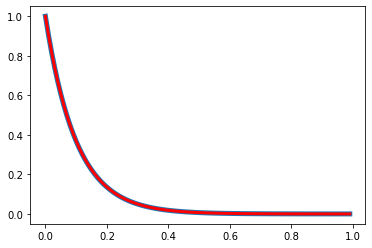

In [4]:
steps = 100
theta_0 = 1.0
const_k = 10.0
delta_t = 1.0 / steps


theta_values = np.zeros(steps)
time_values  = np.zeros(steps)


theta_values[0] = theta_0
time_values[0] = 0.0

for i in range(1, steps):
    theta_values[i] = theta_values[i-1] * (1 - const_k * delta_t + const_k**2 * delta_t**2 / 2.0)
    time_values[i] = time_values[i-1] + delta_t

exact_theta_values = theta_0 * np.exp(-const_k * time_values)
    
plot(time_values, exact_theta_values, linewidth=5.0)
plot(time_values, theta_values, linewidth=3.0, color="red")

```{toctree}
:hidden:
:titlesonly:


1-GroundwaterFlow-LectureNotes
2-FiniteDifferences
3-AdvancedFiniteDifferences
```